In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../data/german_credit.csv')
df.head(20)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [3]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
df.isna().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

1    700
0    300
Name: Creditability, dtype: int64


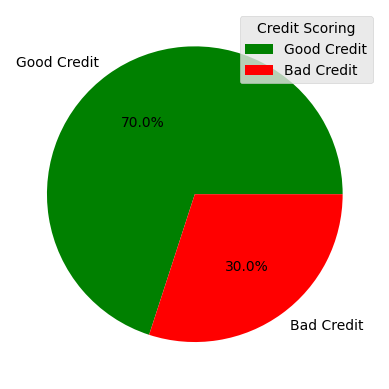

In [6]:
print(df["Creditability"].value_counts())
#Visualising the label column
plt.pie(df["Creditability"].value_counts(),labels = ["Good Credit", "Bad Credit"],colors =["green","red"], autopct = '%1.1f%%',radius = 1)
plt.legend(title= "Credit Scoring")
plt.show()

In [7]:
def replace_values(df, col_replacements):
    for col, replacements in col_replacements.items():
        df[col] = df[col].replace(replacements)
    return df

# Dictionary specifying the columns and their replacement values
col_replacements = {
    'Account Balance': {4: 3},
    'Payment Status of Previous Credit': {0: 1, 4: 3},
    'Value Savings/Stocks': {4: 3, 5: 4},
    'Length of current employment': {2: 1, 3: 2, 4: 3, 5: 4},
    'Occupation': {2: 1, 3: 2, 4: 3},
    'Sex & Marital Status': {2: 1, 3: 2, 4: 3},
    'No of Credits at this Bank': {3: 2, 4: 2},
    'Guarantors': {3: 2},
    'Concurrent Credits': {2: 1, 3: 2},
    'Purpose': {**{i: 3 for i in range(4, 7)}, **{j: 0 for j in range(7, 11)}}
}

# Apply replacements
df = replace_values(df, col_replacements)

remove_cols = ['Foreign Worker', 'No of dependents', 'Guarantors','Duration in Current address']
new_df = df.copy()
new_df.drop(remove_cols,inplace= True, axis =1)

In [8]:
new_df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,Telephone
0,1,1,18,3,2,1049,1,1,4,1,2,21,2,1,1,2,1
1,1,1,9,3,0,2799,1,2,2,2,1,36,2,1,2,2,1
2,1,2,12,2,0,841,2,3,2,1,1,23,2,1,1,1,1
3,1,1,12,3,0,2122,1,2,3,2,1,39,2,1,2,1,1
4,1,1,12,3,0,2171,1,2,4,2,2,38,1,2,2,1,1


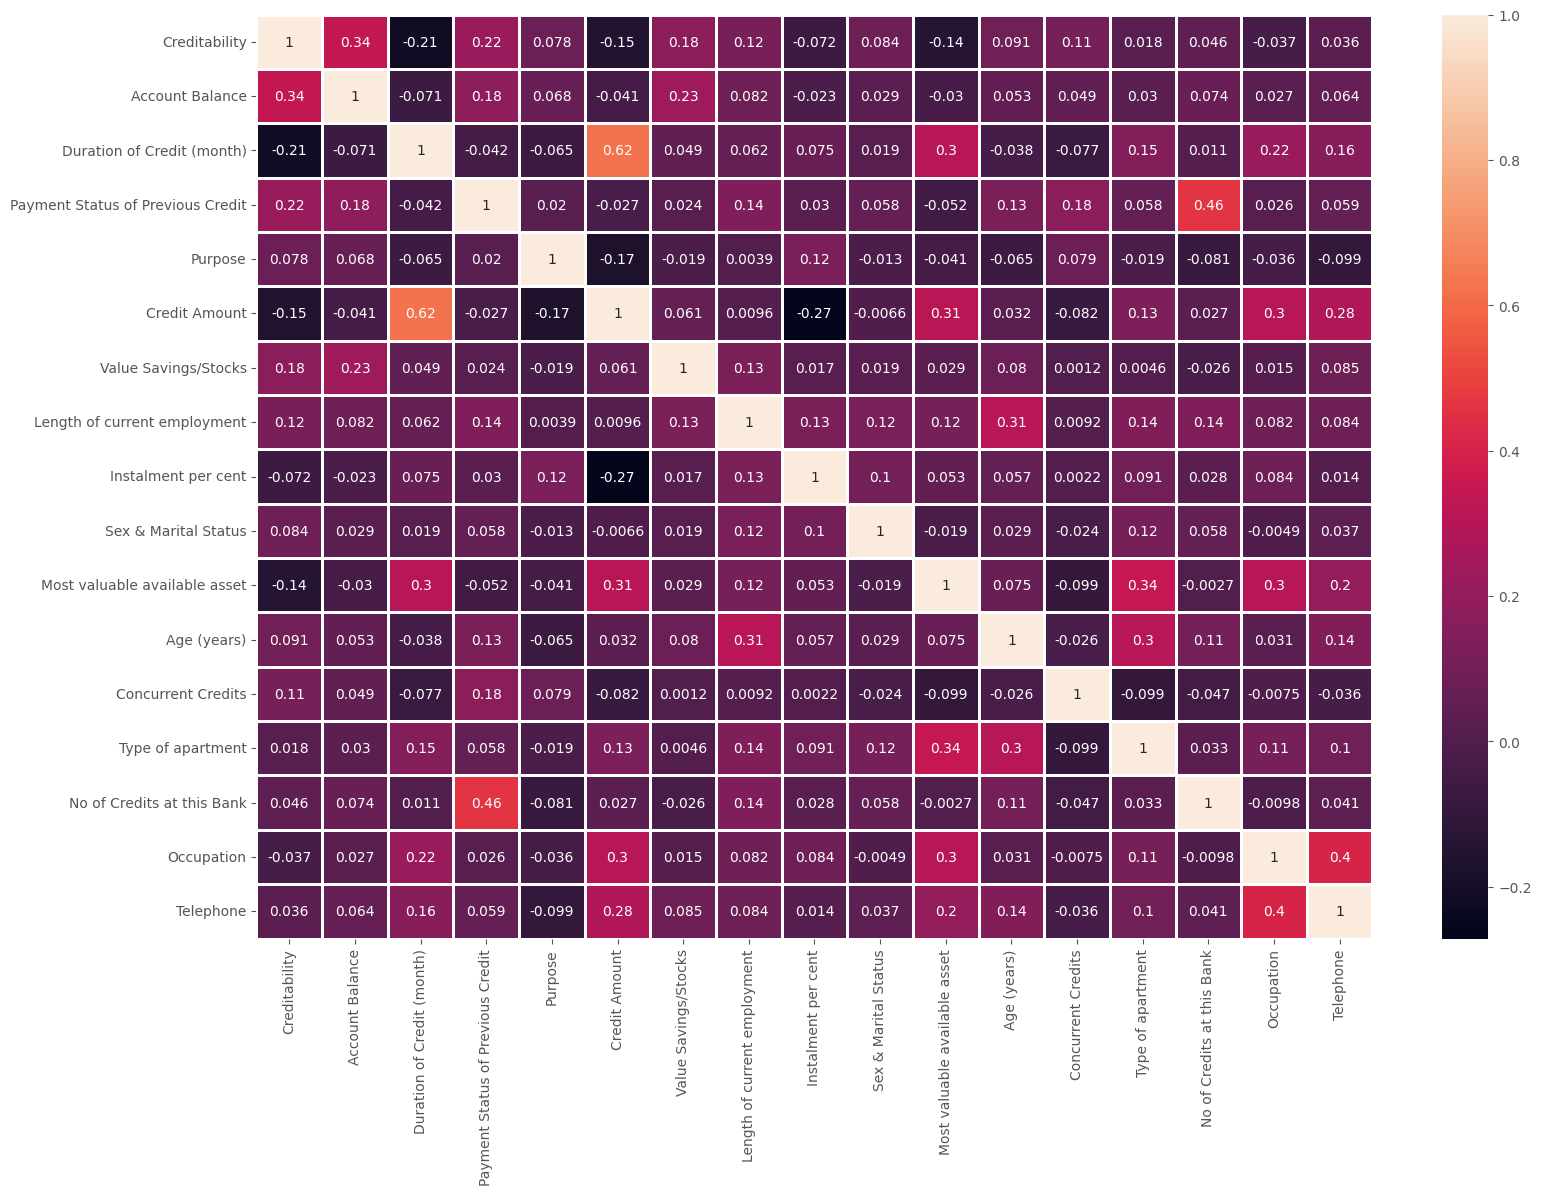

In [9]:
plt.figure(figsize = (18, 12))

corr = new_df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [10]:
new_df.nunique()

Creditability                          2
Account Balance                        3
Duration of Credit (month)            33
Payment Status of Previous Credit      3
Purpose                                4
Credit Amount                        923
Value Savings/Stocks                   4
Length of current employment           4
Instalment per cent                    4
Sex & Marital Status                   3
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     2
Type of apartment                      3
No of Credits at this Bank             2
Occupation                             3
Telephone                              2
dtype: int64

In [11]:
#Creating dependent and independent variables
X = new_df.drop(['Creditability'], axis = 1)
y = new_df['Creditability']

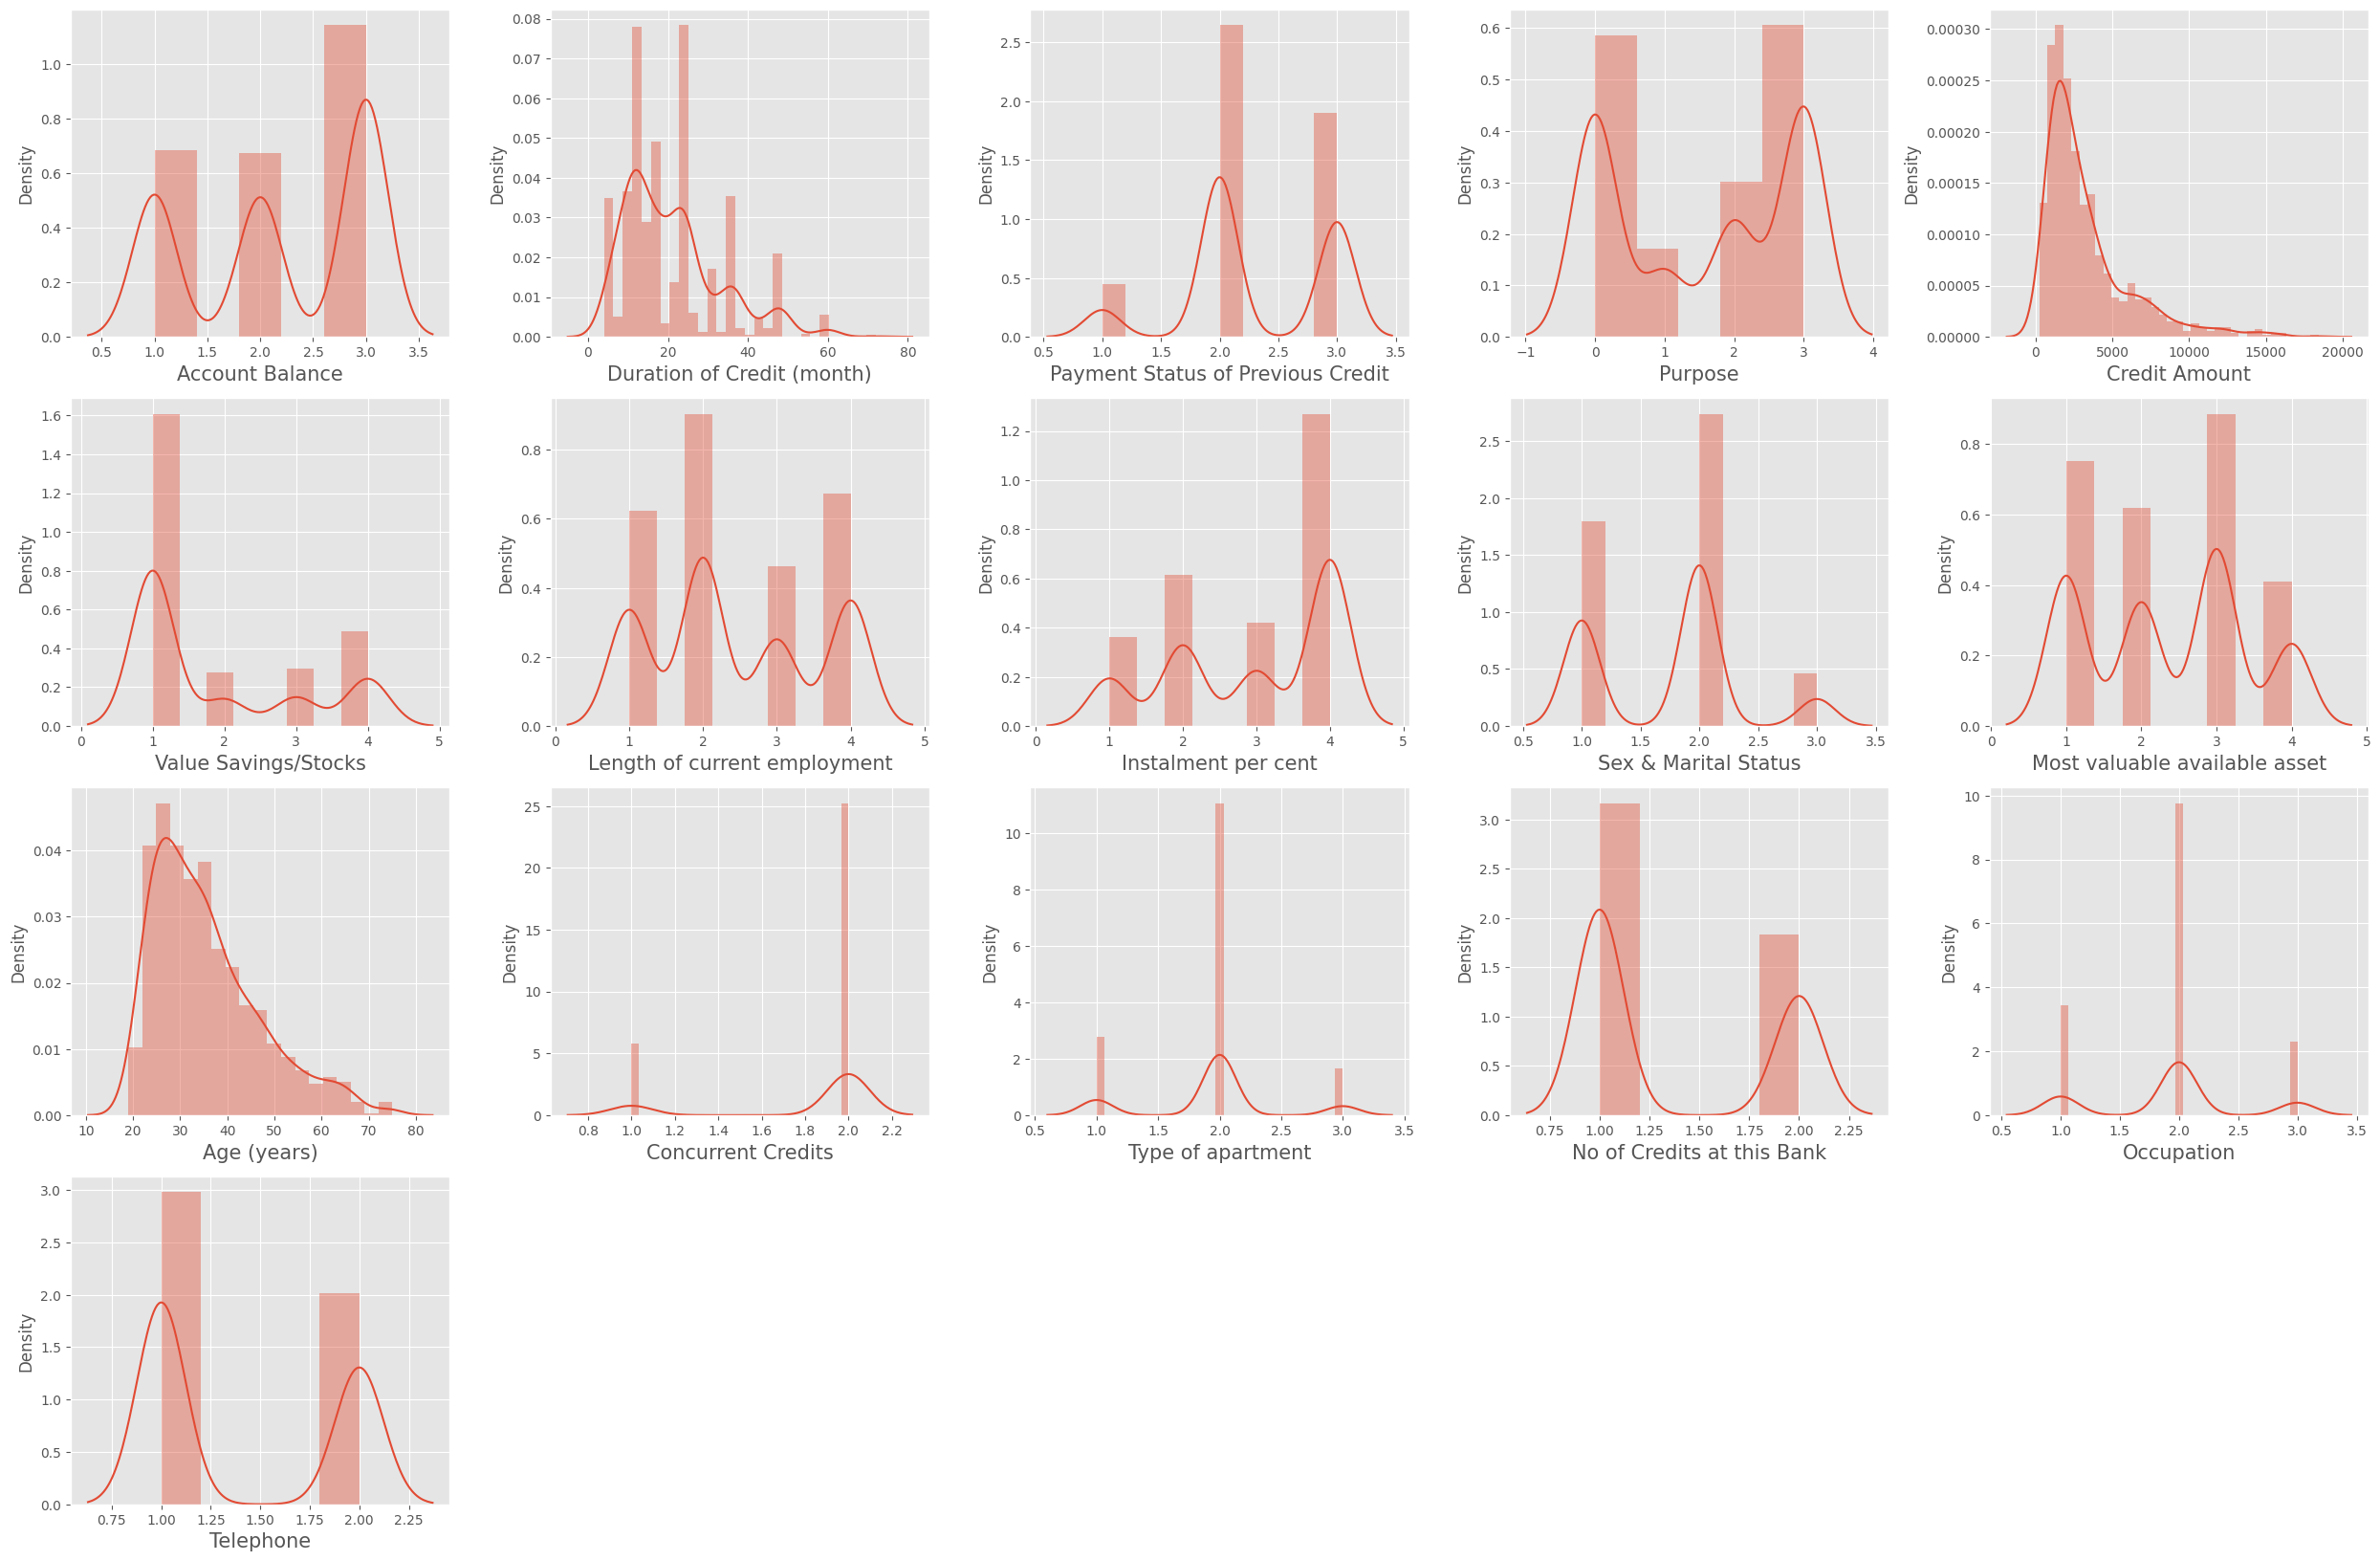

In [12]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

Save the scaler

In [14]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

# Resample the training data
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [17]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model,
knn = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 10, 50, 75, 100, 200, 350, 500],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
cv = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
# Set up the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='roc_auc', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
print(best_model)

# Make predictions
y_pred = best_model.predict(X_test)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=10, metric='manhattan', weights='distance')


In [18]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, best_model.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 1.0
Test accuracy of KNN is : 0.692
[[ 50  25]
 [ 52 123]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.56        75
           1       0.83      0.70      0.76       175

    accuracy                           0.69       250
   macro avg       0.66      0.68      0.66       250
weighted avg       0.73      0.69      0.70       250



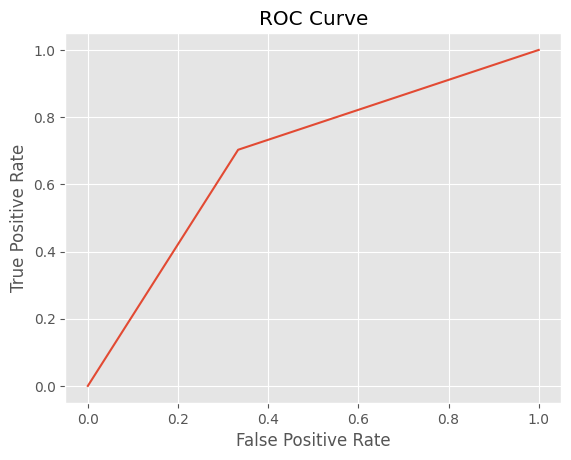

AUC: 0.7085714285714286


In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, y_proba)
print('AUC:', auc)

In [20]:
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best hyperparameters:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.9387357653232108


In [21]:
best_params = grid_search.best_params_
model = KNeighborsClassifier(**best_params)
model.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, metric='manhattan', weights='distance')

In [22]:
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print(f'K-Fold CV Accuracy: {accuracy.mean()} ± {accuracy.std()}')

f1 = cross_val_score(model, X, y, cv=kfold, scoring='f1')

print(f'K-Fold CV F1 Score: {f1.mean()} ± {f1.std()}')

auc = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

print(f'K-Fold CV AUC: {auc.mean()} ± {auc.std()}')

recall = cross_val_score(model, X, y, cv=kfold, scoring='recall')

print(f'K-Fold CV Recall: {recall.mean()} ± {recall.std()}')

precision = cross_val_score(model, X, y, cv=kfold, scoring='precision')

print(f'K-Fold CV Precision: {precision.mean()} ± {precision.std()}')

K-Fold CV Accuracy: 0.731 ± 0.03700000000000001
K-Fold CV F1 Score: 0.8210200767628171 ± 0.025488188757040835
K-Fold CV AUC: 0.7241190476190477 ± 0.04879605505224918
K-Fold CV Recall: 0.8828571428571429 ± 0.047294129592133846
K-Fold CV Precision: 0.7688919554866457 ± 0.029849447835405406


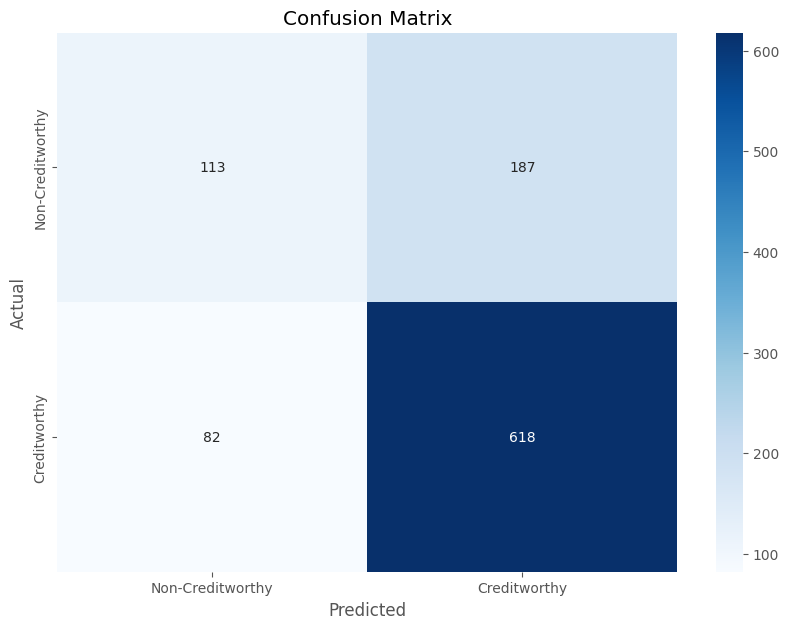

In [23]:
# Confusion Matrix after k-fold CV
y_true = []
y_pred = []

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_true.extend(y_test)
    y_pred.extend(predictions)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Creditworthy', 'Creditworthy'], yticklabels=['Non-Creditworthy', 'Creditworthy'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [24]:
results = {
        'acc': accuracy.mean(),
        'precision': precision.mean(),
        'recal': recall.mean(),
        'f1': f1.mean(),
        'auc': auc.mean(),
        'confus matrix': cm.tolist()  # Convert numpy array to list for JSON serialization
    }

In [25]:
import json

with open('KNN_evaluation.json', 'w') as json_file:
    json.dump(results, json_file, indent=4)

SAVE MODEL

In [26]:
pickle.dump(model, open('KNN_model.pkl', 'wb'))